## How `n_min_threshold` changes what features are detected

#### Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tobac
import xarray as xr

#### Generate Feature Data

Here, we will generate some simple feature data with a variety of features, large and small. 

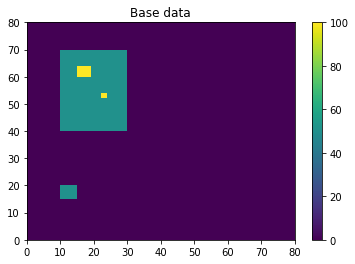

In [17]:
# Dimensions here are time, y, x.
input_field_arr = np.zeros((1,80,80))
# small 5x5 feature, area of 25 points
input_field_arr[0, 15:20, 10:15]=50
# larger 30x30 feature, area of 900
input_field_arr[0, 40:70, 10:30]=50
# small 2x2 feature within larger 30x30 feature, area of 4 points
input_field_arr[0, 52:54, 22:24]=100
# small 4x4 feature within larger 30x30 feature, area of 16 points
input_field_arr[0, 60:64, 15:19]=100

plt.pcolormesh(input_field_arr[0])
plt.colorbar()
plt.title("Base data")
plt.show()

In [12]:
# We now need to generate an Iris DataCube out of this dataset to run tobac feature detection. 
# One can use xarray to generate a DataArray and then convert it to Iris, as done here. 
input_field_iris = xr.DataArray(input_field_arr, dims=['time', 'Y', 'X'], coords={'time': [np.datetime64('2019-01-01T00:00:00')]}).to_iris()
# Version 2.0 of tobac (currently in development) will allow the use of xarray directly with tobac. 

#### No `n_min_threshold`
If we keep `n_min_threshold` at the default value of `0`, all three features will be detected with the appropriate thresholds used.

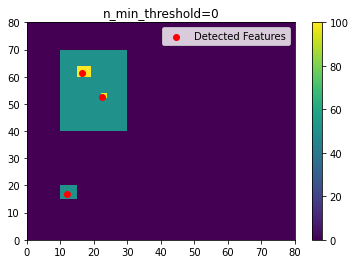

In [18]:
thresholds = [50, 100]
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature.
# All filtering is off in this example, although that is not usually recommended.
single_threshold_features = tobac.feature_detection_multithreshold(field_in = input_field_iris, dxy = 1000, threshold=thresholds, target='maximum', position_threshold='center', sigma_threshold=0)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(x=single_threshold_features['hdim_2'].values, y=single_threshold_features['hdim_1'].values, color='r', label="Detected Features")
plt.legend()
plt.title("n_min_threshold=0")
plt.show()

#### Increasing `n_min_threshold`
As we increase `n_min_threshold`, fewer of these separate features are detected. 

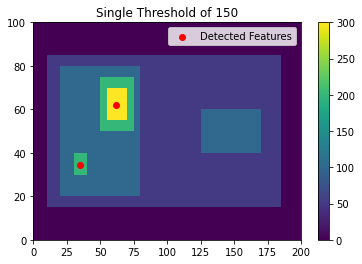

In [5]:
thresholds = [50, 100]
n_min_threshold = 4
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature.
# All filtering is off in this example, although that is not usually recommended.
single_threshold_features = tobac.feature_detection_multithreshold(field_in = input_field_iris, dxy = 1000, threshold=thresholds, target='maximum', position_threshold='center', sigma_threshold=0,
    n_min_threshold=n_min_threshold)
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(x=single_threshold_features['hdim_2'].values, y=single_threshold_features['hdim_1'].values, color='r', label="Detected Features")
plt.legend()
plt.title("n_min_threshold={0}".format(n_min_threshold))
plt.show()

This gives us two detected features with minimum values >150. 

#### Multiple Thresholds
Now let's say that you want to detect all three maxima within this feature. You may want to do this, if, for example, you were trying to detect overhshooting tops within a cirrus shield. You could pick a single threshold, but if you pick 100, you won't separate out the two features on the left. For example:

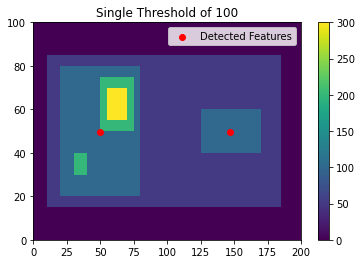

In [6]:
thresholds = [100, ]
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature
single_threshold_features = tobac.feature_detection_multithreshold(field_in = input_field_iris, dxy = 1000, threshold=thresholds, target='maximum', position_threshold='center')
plt.pcolormesh(input_field_arr[0])
plt.colorbar()

# Plot all features detected
plt.scatter(x=single_threshold_features['hdim_2'].values, y=single_threshold_features['hdim_1'].values, color='r', label="Detected Features")
plt.legend()
plt.title("Single Threshold of 100")
plt.show()

This is the power of having multiple thresholds. We can set thresholds of 50, 100, 150, 200 and capture both:

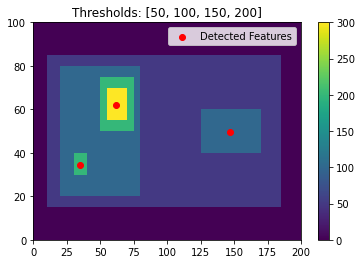

In [7]:
thresholds = [50, 100, 150, 200]
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature
single_threshold_features = tobac.feature_detection_multithreshold(field_in = input_field_iris, dxy = 1000, threshold=thresholds, target='maximum', position_threshold='center')
plt.pcolormesh(input_field_arr[0])
plt.colorbar()

# Plot all features detected
plt.scatter(x=single_threshold_features['hdim_2'].values, y=single_threshold_features['hdim_1'].values, color='r', label="Detected Features")
plt.legend()
plt.title("Thresholds: [50, 100, 150, 200]")
plt.show()